# PLOT EXAMPLE
#### using matplitb ans stat packages
#### to plot ascombe quertet

# MOR INFO.  

#### * Matplolib tutorials, some good, some not
https://matplotlib.org/tutorials/index.html

#### * Probably the best book on data science wiht python   
https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html

#### * Excellent blog to start with on API ploitting style wiht plt   
https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo

#### * matplotlib.patches:   
contains plotting functions for shapes such as rectangiulars, elipses, circles, arrows,    
https://matplotlib.org/3.1.1/api/patches_api.html

#### * custome ticks  
https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html 

#### * legend  
https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html


#### * interesting code that i haven't used

* defining subplots    
ax1 = fig.add_subplot(221).  

* plt.ficgure() # simpler format   
plt.figure()      
ax1 = plt.axes()     
ax1.plot(x,y)    

* log scale:    
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

In [2]:
# general imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for ascomebe
from scipy import stats # for regression line 
from matplotlib.patches import Rectangle # for drawing a rectangel
import matplotlib.ticker as ticker # for custome ticks on multiplot

/Users/pawel/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:104: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/pawel/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:104: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/pawel/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:104: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/pawel/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:104: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


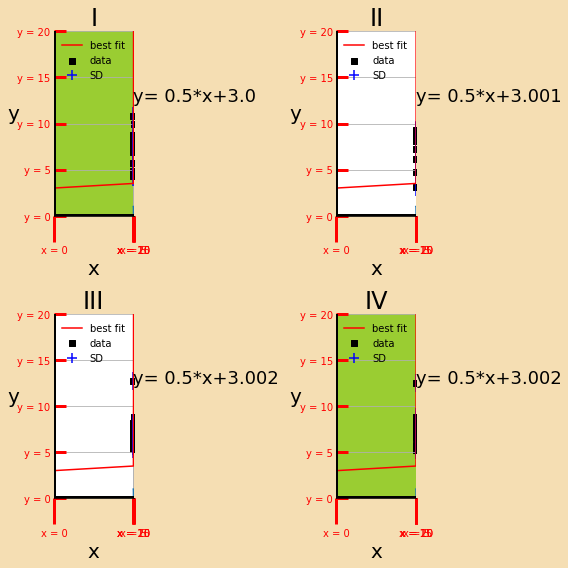

In [25]:
def main():
    """
        Plot ascomebe quartets using matplotlib
    """

    # import data
    data_set_name = 'anscombe'
    df = sns.load_dataset(data_set_name)   
    
    # charts
    nrow = ncol = 2
    datasets = df.iloc[:,0].unique().tolist()

    # figure
    fig, axs = plt.subplots(nrows=nrow, ncols=ncol, 
                            figsize=(nrow*4,ncol*4),
                            facecolor='wheat'
                           )   
        
    # individual plots wiht each dataset
    plot_nr = 0
    for i, row in enumerate(axs):
        for j, ax in enumerate(row):

            # prepare the data
            data1, data2 = prepare_ascombe_dataset(df, datasets, plot_nr)
        
            # plot
            param_dict = {"marker":"s"}
            plot_ascombe(ax, data1, data2, plot_nr, datasets, **param_dict)
        
            # plot index
            plot_nr +=1
  
    plt.tight_layout( )
    plt.show( );


        
# helper functions


def prepare_ascombe_dataset(df, datasets, plot_nr):
    """
        extract the data, and create flatten np.array
    """
    df_one_dataset = df.loc[df.dataset.values==datasets[plot_nr],:]
    
    data1 = df_one_dataset.loc[:,"x"]
    data2 = df_one_dataset.loc[:,"y"]

    return data1, data2



def plot_ascombe(ax, data1, data2, plot_nr, datasets, **param_dict):
    """
        plot ascomebe dataset on scatterplots
        with a regression line
    """

    # add title
    ax.set_title(datasets[plot_nr], fontsize=24, color="black")   
    #ax.title.set_color('red')
    
    
    # Generated linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(data1,data2)
    x = np.arange(100).flatten()
    line = slope*x+intercept

    # plot a rectangle for the bacground (because its layer by layer)
    # https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html
    if(plot_nr == 1) or (plot_nr == 2):
        bottom_left_X = bottom_left_Y = 6
        ax.add_patch(Rectangle((bottom_left_X, bottom_left_Y), 6, 6,alpha=1, color="lightgrey"))
    else:
        ax.set_facecolor('yellowgreen') # chnages the bacgound color, 
        # not affecting points like a rectangular
    
    
    # plot points, lines, and grid
    ax.scatter(data1, data2, **param_dict, color="black", label="data")
    ax.plot(x, line, '-', color='red', label="best fit") 
    
    
    ## grid
    ax.grid(True) # grid is on
 
    # add error bars (all == 1, its just an example)
    xerror = yerror = np.ones_like(data1)
    ax.errorbar(data1, data2, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='blue',label="SD")

    # set plot range and add custome ticks
    # https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html   
    ticks_at = list(range(0,20+1,5))
    tick_labels = ["".join(["kcbvi",str(x),"$"]) for x in ticks_at]
    
    # x
    ax.set_xlim(ticks_at[0],ticks_at[-1]) # x axis
    ax.set_xlabel("x", fontsize=20, color="black")		
    ax.set_xticks(ticks_at)
    
    # y
    ax.set_ylim(ticks_at[0],ticks_at[-1])# y axis
    ax.set_ylabel("y", rotation=0, fontsize=20, color="black")		
    ax.set_yticks(ticks_at)
	
       
    # Custome tick labels (in this format, ax.set_xticilabels() doent work)
    @ticker.FuncFormatter # FuncFormatter can be used as a decorator   
    def major_formatter_function(x, pos):
        return "".join( ["x = ", str(x)]) 
    ax.xaxis.set_major_formatter(major_formatter_function)
    
    @ticker.FuncFormatter 
    def major_formatter_function(x, pos):
        return "".join( ["y = ", str(x)]) 
    ax.yaxis.set_major_formatter(major_formatter_function)  
    
    # remove borders on plot, labels and tick will stay,
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True) # x axis
    ax.spines['left'].set_visible(True)   # y axis
    
    # set colors for spines, and tick labels
    ax.spines['bottom'].set_color("black") # x axis
    ax.spines['left'].set_color("black")   # y axis    
    ax.tick_params(axis='x', colors='red', direction='out', length=26, width=3) # tick only
    ax.tick_params(axis='y', colors='red', direction='in', length=12, width=3)
    
    # axes line width
    ax.axhline(linewidth=4, color="black")
    ax.axvline(linewidth=4, color="black")
    
    
    # text on each plot
    line_formula = f'y= {round(slope,3)}*x+{round(intercept,3)}'   
    ax.text(1,13, line_formula, fontsize=18,
                horizontalalignment='left',
                verticalalignment='center')
    
    # legend
    # https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
    ax.legend(loc='upper right', frameon=False) # frameon=False, no box arround the legend
    
    # return
    return ax
        
      
if __name__ == '__main__':
    main()         

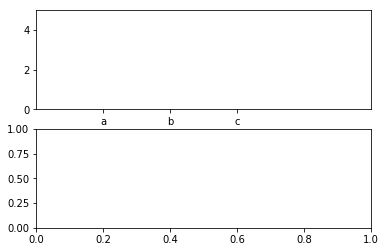

In [3]:
"""
    simple way for customizing tick labels
    do not work when ax is packed into a function, then I had to use eastetics @
"""

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_xlim(0,5)
ax[0].set_ylim(0,5)
ax[0].set_xticks([1,2,3])
ax[0].set_xticklabels(["a","b","c"])
plt.show();

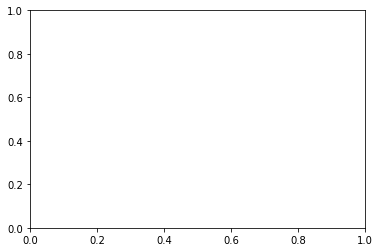

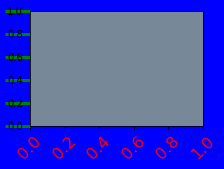

In [23]:
"""
    useful accessor methods of the ``Axis``
    https://matplotlib.org/tutorials/intermediate/artists.html
"""

fig, ax = plt.subplots()
axis = ax.xaxis
axis.get_ticklocs()

axis.get_ticklines(minor=True)

# Here is a summary of some of the useful accessor methods of the ``Axis``
# (these have corresponding setters where useful, such as
# set_major_formatter)
#
# ======================  =========================================================
# Accessor method         Description
# ======================  =========================================================
# get_scale               The scale of the axis, e.g., 'log' or 'linear'
# get_view_interval       The interval instance of the axis view limits
# get_data_interval       The interval instance of the axis data limits
# get_gridlines           A list of grid lines for the Axis
# get_label               The axis label - a Text instance
# get_ticklabels          A list of Text instances - keyword minor=True|False
# get_ticklines           A list of Line2D instances - keyword minor=True|False
# get_ticklocs            A list of Tick locations - keyword minor=True|False
# get_major_locator       The matplotlib.ticker.Locator instance for major ticks
# get_major_formatter     The matplotlib.ticker.Formatter instance for major ticks
# get_minor_locator       The matplotlib.ticker.Locator instance for minor ticks
# get_minor_formatter     The matplotlib.ticker.Formatter instance for minor ticks
# get_major_ticks         A list of Tick instances for major ticks
# get_minor_ticks         A list of Tick instances for minor ticks
# grid                    Turn the grid on or off for the major or minor ticks
# ======================  =========================================================
#
# Here is an example, not recommended for its beauty, which customizes
# the axes and tick properties

# plt.figure creates a matplotlib.figure.Figure instance
fig = plt.figure()
rect = fig.patch  # a rectangle instance
rect.set_facecolor('blue')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4])
rect = ax1.patch
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('red')
    label.set_rotation(45)
    label.set_fontsize(16)

for line in ax1.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color('green')
    line.set_markersize(25)
    line.set_markeredgewidth(3)

plt.show()

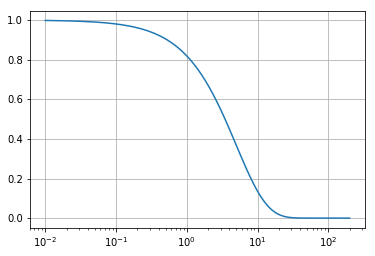

In [27]:
"""
    set log scale
"""

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

dt = 0.01
t = np.arange(dt, 200.0, dt)

ax.semilogx(t, np.exp(-t / 5.0))
ax.grid()

plt.show()